<a href="https://colab.research.google.com/github/klipbn/klip_alex/blob/main/determination_of_promising_tariff/determination_of_promising_tariff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение перспективного тарифа для телеком-компании

**Описание проекта**

Компания «Мегалайн» — федеральный оператор сотовой связи. Которая предлогает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Требуется сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.   

**Описание тарифов**
**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 1 рубль; 
2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.  
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


**Этапы проведения исследования**  

**Шаг 1.** Изучение общей информации о данных  
Путь к файлам:  
- ~/datasets/calls.csv.
- ~/datasets/internet.csv. 
- ~/datasets/messages.csv.   
- ~/datasets/tariffs.csv.   
- ~/datasets/users.csv. 

**Шаг 2.** Предобработка данных    
Приведием данные к нужным типам;  
Найдем и исправим ошибки в данных, если они есть.  
Поясним, какие ошибки мы нашли и как их исправили. В данных мы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.  
Посчитаем для каждого пользователя:  
- количество сделанных звонков и израсходованных минут разговора по месяцам;  
- количество отправленных сообщений по месяцам;  
- объем израсходованного интернет-трафика по месяцам;  
- помесячную выручку с каждого пользователя (вычтем бесплатный лимит из - суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).  

**Шаг 3.** Анализ данных   
Опишем поведение клиентов оператора, исходя из выборки.  
Определим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?  
Посчитаем среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы.  
Опишем распределения.  

**Шаг 4.** Проверка гипотез   

Проверим гипотезы:  
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 

Пороговое значение alpha (уровень статической значимости) задалим 0.05 %.  
Дадим пояснения:  
- как формулировали нулевую и альтернативную гипотезы;  
- какой критерий использовали для проверки гипотез и почему.  

**Шаг 5.** Общий вывод  

Сделаем резюме исследования.

## **Шаг 1.** Изучение общей информации о данных 

Импортируем библиотеки необходимыe для работы:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt

### Таблица users

In [ ]:
df_users = pd.read_csv('/datasets/users.csv') # читаем данные

Выведем информацию о таблице:

In [ ]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Описание данных**  

Таблица `users` (информация о пользователях):  
- `user_id` — уникальный идентификатор пользователя  
- `first_name` — имя пользователя  
- `last_name` — фамилия пользователя  
- `age` — возраст пользователя (годы)  
- `reg_date` — дата подключения тарифа (день, месяц, год)  
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
- `city` — город проживания пользователя  
- `tariff` — название тарифного плана

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


### Таблица calls

In [ ]:
df_calls = pd.read_csv('/datasets/calls.csv') # читаем данные

Выведем информацию о таблице:

In [ ]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**Описание данных**  


Таблица `calls` (информация о звонках):
- `id` — уникальный номер звонка  
- `call_date` — дата звонка  
- `duration` — длительность звонка в минутах  
- `user_id` — идентификатор пользователя, сделавшего звонок    

In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [ ]:
df_calls[df_calls['duration'] == 0]

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


### Таблица internet

In [ ]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0) # читаем данные

Выведем информацию о таблице:

In [ ]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


**Описание данных**  


Таблица `internet` (информация об интернет-сессиях):
- `id` — уникальный номер сессии  
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)  
- `session_date` — дата интернет-сессии  
- `user_id` — идентификатор пользователя

In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
df_internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [ ]:
df_internet[df_internet['mb_used'] == 0]

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499
149381,1499_142,0.0,2018-11-01,1499
149383,1499_144,0.0,2018-11-27,1499
149386,1499_147,0.0,2018-10-21,1499


### Таблица messages

In [ ]:
df_messages = pd.read_csv('/datasets/messages.csv')

Выведем информацию о таблице:

In [ ]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица `messages` (информация о сообщениях):  
- `id` — уникальный номер сообщения  
- `message_date` — дата сообщения  
- `user_id` — идентификатор пользователя, отправившего сообщение  

In [ ]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Таблица tariffs

In [ ]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv') # читаем данные

Выведем информацию о таблице:

In [ ]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Описание данных**  

Таблица `tariffs` (информация о тарифах):
- `tariff_name` — название тарифа  
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях  
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату  
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату  
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета  
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [ ]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод

При изучении общей информации, стоит отметить:  
- даные достаточно корретные, явных выбросов и анамалий не замечено;
- признаки с датой требуется привести к формату даты;
- имеются пропущенные значения в таблице `users` в колонке `churn_date`, что означет, пользователь еще пользуется тарифом; 
- в таблицах `calls` и `internet` имеются нулевые значения в продолжительности разговора и использовании интернет-трафика, что может соответстовать пропущенным звонкам, либо пользователь набрал и сбросил, так и трафик, предполжительно менее 0.04 МБ;
- признаки продолжительность вызова и использования интернет-трафика требуется округлить согласно правилам оператор.

## **Шаг 2.** Предобработка данных

### Замена типов данных

Приведем данные в колонках с датами наших данных к формату даты:

In [ ]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам

In [ ]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Исходя из условий округлим минуты в большую сторону, а также приведет к типу целочисленных данных:

In [ ]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')

Создадим колонку с месяцем, она потребуется для группировки, в том числе расчета помесячной выручки:

In [ ]:
df_calls['month'] = df_calls['call_date'].dt.month

Создадим свободную таблицу с количеством сделанных звонком и израсходованных минут, и выведем ее на экран:

In [ ]:
df_calls_month = df_calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index().rename(columns = {'sum': 'minutes', 'count': 'call_number'})

In [ ]:
df_calls_month.head()

,user_id,month,call_number,minutes
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


### Рассчет количества отправленных сообщений по месяцам

In [ ]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Создадим колонку с месяцем, она потребуется для группировки, в том числе расчета помесячной выручки:

In [ ]:
df_messages['month'] = df_messages['message_date'].dt.month

Создадим свободную таблицу с количеством отправленных сообщений, и выведем ее на экран:

In [ ]:
df_messages_month = df_messages.groupby(['user_id', 'month'])['user_id'].agg(['count']).reset_index().rename(columns = {'count': 'msg_number'})

In [ ]:
df_messages_month.head()

,user_id,month,msg_number
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Рассчет объема израсходованного интернет-трафика по месяцам

In [ ]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Для однотипности величин измерения трафика, переведем МГ в ГБ:

In [ ]:
df_internet['mb_used'] = df_internet['mb_used']/1024

Переименуем колонку с потреблением трафика:

In [ ]:
df_internet = df_internet.rename(columns={'mb_used': 'gb_used'})

Создадим колонку с месяцем, она потребуется для группировки, в том числе расчета помесячной выручки:

In [ ]:
df_internet['month'] = df_internet['session_date'].dt.month

Создадим свободную таблицу с объемом израсходованного интернет-трафика, и выведем ее на экран:

In [ ]:
df_internet_month = df_internet.groupby(['user_id', 'month'])['gb_used'].agg(['sum']).reset_index().rename(columns = {'sum': 'gb_used'})

Округлим ГБ согласно правилам оператора:

In [ ]:
df_internet_month['gb_used'] = df_internet_month['gb_used'].apply(np.ceil).astype('int')

In [ ]:
df_internet_month.head()

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


### Рассчет помесячной выручки с каждого пользователя

Для дальнейшей работы соединим таблицы со звонками, сообщениями и интернет-трафиком вместе:

In [ ]:
df = df_calls_month.merge(df_messages_month, on=['user_id', 'month'], how='outer')

In [ ]:
df = df.merge(df_internet_month, on=['user_id', 'month'], how='outer')

Посмотрим, сколько пропущенных значений получилось (они возникают из-за того, что пользователь мог использовать только интернет или сообщения, или звонить):

In [ ]:
df.isna().sum()

user_id          0
month            0
call_number     40
minutes         40
msg_number     497
gb_used         11
dtype: int64

Видим, что достаточное количество пользователей вообще не используют сообщения.  
Данные пропуски можно заполнить "0". Заполним:

In [ ]:
df = df.fillna(0).astype('int')

Добавим к нашим данным таблицу с данными пользователей:

In [ ]:
df = df.merge(df_users, on = 'user_id', how = 'left')

Для удобсва представления, признак включенный интернет-трафик в таблице описания тарифа переведем с МБ в ГБ, а также переименуем наименование колонки, в том числе и переименуем колонку с названием тарифа:

In [ ]:
df_tariffs['mb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024

In [ ]:
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff', 'mb_per_month_included': 'gb_per_month_included'})

Присоединим таблицу с описанием тарифа к нашим данным:

In [ ]:
df = df.merge(df_tariffs, on = 'tariff', how = 'outer')

Посмотрим на первые 10 строк наших данных:

In [ ]:
df.head(10)

,user_id,month,call_number,minutes,msg_number,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
5,1000,10,57,350,73,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
6,1000,11,43,338,58,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
7,1000,12,46,333,70,10,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
8,1003,8,55,380,37,9,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30.0,3000,1950,150,1,1
9,1003,9,134,961,91,13,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30.0,3000,1950,150,1,1


Выведем информацию о таблице:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   call_number            3214 non-null   int64         
 3   minutes                3214 non-null   int64         
 4   msg_number             3214 non-null   int64         
 5   gb_used                3214 non-null   int64         
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

Для вычисления помесясячной выручки, опредлим функцию `total_fee`:

In [ ]:
def total_fee(row):
  # присовим переменной total_fee_number значения с колонки "rub_monthly_fee",
  # после чего сравним разность расхода и лимита, если она больше нула, полученое значения умножим на стоимость за ед.
  total_fee_number = row['rub_monthly_fee']
  if (row['minutes'] - row['minutes_included']) > 0:
    total_fee_number +=  (row['minutes'] - row['minutes_included'])*row['rub_per_minute']
  if (row['msg_number'] - row['messages_included']) > 0:
    total_fee_number +=  (row['msg_number'] - row['messages_included'])*row['rub_per_message']
  if (row['gb_used'] - row['gb_per_month_included']) > 0:
    total_fee_number +=  (row['gb_used'] - row['gb_per_month_included'])*row['rub_per_gb']
  return total_fee_number

Создадим колонку с помесячной выручкой с каждого пользователя `'total_fee'` применяя ко всем строкам функцию `total_fee`:

In [ ]:
df['total_fee'] = df.apply(total_fee, axis=1)

Посмотрим на 5 самых тратящих пользователей:

In [ ]:
df.sort_values(by='total_fee', ascending=False).head()

,user_id,month,call_number,minutes,msg_number,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_fee
3156,1486,12,133,1007,83,38,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15.0,500,550,200,3,3,6770.0
1183,1042,12,121,728,75,37,42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15.0,500,550,200,3,3,5709.0
3155,1486,11,108,764,96,36,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15.0,500,550,200,3,3,5680.0
2177,1261,12,141,1074,22,32,46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15.0,500,550,200,3,3,5672.0
2298,1286,12,95,739,68,35,19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15.0,500,550,200,3,3,5321.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   call_number            3214 non-null   int64         
 3   minutes                3214 non-null   int64         
 4   msg_number             3214 non-null   int64         
 5   gb_used                3214 non-null   int64         
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

Для дальнейшей работе приведем финальную таблицу в нужный вид (уберем лишние признаки (Фамилию, Имя, данные о тарифах):)

In [ ]:
df['total_fee'] = df['total_fee'].astype('int')

In [ ]:
 df.drop((list(df_tariffs.columns)[:7] + ['first_name', 'last_name']), axis=1, inplace=True) 

Выведем финальную таблицу:

In [ ]:
df.head()

,user_id,month,call_number,minutes,msg_number,gb_used,age,churn_date,city,reg_date,tariff,total_fee
0,1000,5,22,159,22,3,52,NaT,Краснодар,2018-05-25,ultra,1950
1,1000,6,43,172,60,23,52,NaT,Краснодар,2018-05-25,ultra,1950
2,1000,7,47,340,75,14,52,NaT,Краснодар,2018-05-25,ultra,1950
3,1000,8,52,408,81,14,52,NaT,Краснодар,2018-05-25,ultra,1950
4,1000,9,58,466,57,15,52,NaT,Краснодар,2018-05-25,ultra,1950


Проверим наличие дубликатов:

In [ ]:
df.duplicated().sum()

0

### Вывод

Подготовили сводную общую таблицу для дальнейшей работы.  
Добавили колонку `'total_fee'` с помесячной выручкой по каждому пользователю.  
Определили отсутствие дубликатов, привели данные с датами к типу дата.


## **Шаг 3.** Анализ данных

Создадим датафрейм с тарифом "Ультра":

In [ ]:
df_ultra = (df[df['tariff'] == 'ultra']).copy()

Создадим датафрейм с тарифом "Смарт":

In [ ]:
df_smart = (df[df['tariff'] == 'smart']).copy()

### Минуты на тарифах

Посмотрим список характерных значения для минут, на тарифе "Смарт" и "Ультра":

In [ ]:
df.groupby(['tariff'])['minutes'].agg(['describe', np.var]).reset_index()

tariff describe                          ...                                  var
            count        mean         std  ...    50%    75%     max        minutes
0  smart   2229.0  417.934948  190.313730  ...  422.0  545.0  1435.0   36219.315784
1  ultra    985.0  526.623350  317.606098  ...  518.0  752.0  1673.0  100873.633397

[2 rows x 10 columns]

Построим распределение расхода минут на тарифах:

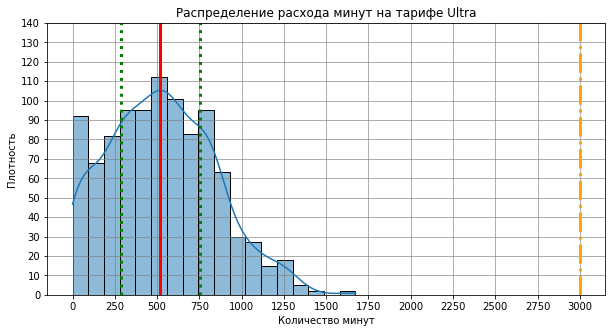

In [ ]:
plt.rcParams['figure.figsize']=(10, 5)
sns.histplot(data=df_ultra, x="minutes", kde=True)
plt.title('Распределение расхода минут на тарифе Ultra')
plt.ylabel('Плотность')
plt.xlabel('Количество минут')
plt.grid(color='grey', axis='both', alpha=0.8)
plt.axvline(x=3000, c="orange", linewidth = 3, linestyle='-.') # лимит на тарифе
plt.axvline(x=np.median(df_ultra['minutes']), c="red", linewidth = 3) # медиана
# интервал наиболее частых значений
plt.axvline(x=np.percentile(df_ultra['minutes'], 25), c='g', linestyle=':', linewidth = 3)
plt.axvline(x=np.percentile(df_ultra['minutes'], 75), c='g', linestyle=':', linewidth = 3)
plt.xticks(np.arange(0, 3100, 250))
plt.yticks(np.arange(0, 150, 10))
plt.show()

Примечание:  
Зеленые линии - интервал наиболее частных значений.  
Красная линия - медиана.  
Оранжевая линия - лимит по тарифу.  

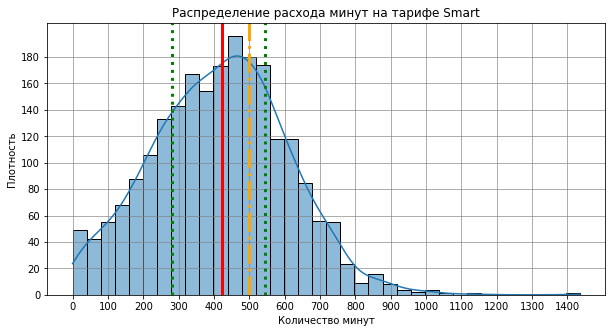

In [ ]:
plt.rcParams['figure.figsize']=(10, 5)
sns.histplot(data=df_smart, x="minutes", kde=True)
plt.title('Распределение расхода минут на тарифе Smart')
plt.ylabel('Плотность')
plt.xlabel('Количество минут')
plt.grid(color='grey', axis='both', alpha=0.8)
plt.axvline(x=500, c="orange", linewidth = 3, linestyle='-.') # лимит на тарифе
plt.axvline(x=np.median(df_smart['minutes']), c="red", linewidth = 3) # медиана
# интервал наиболее частых значений
plt.axvline(x=np.percentile(df_smart['minutes'], 25), c='g', linestyle=':', linewidth = 3)
plt.axvline(x=np.percentile(df_smart['minutes'], 75), c='g', linestyle=':', linewidth = 3)
plt.xticks(np.arange(0, 1500, 100))
plt.yticks(np.arange(0, 200, 20))
plt.show()

Примечание:  
Зеленые линии - интервал наиболее частных значений.  
Красная линия - медиана.  
Оранжевая линия - лимит по тарифу.  

Доля пользователей, которые расходуют минут больше, чем по лимиту на тарифе:

In [ ]:
1 - st.norm(df_smart['minutes'].mean(), df_smart['minutes'].std()).cdf(500)

0.33315809361132764

Представим в виде диграммы размаха:

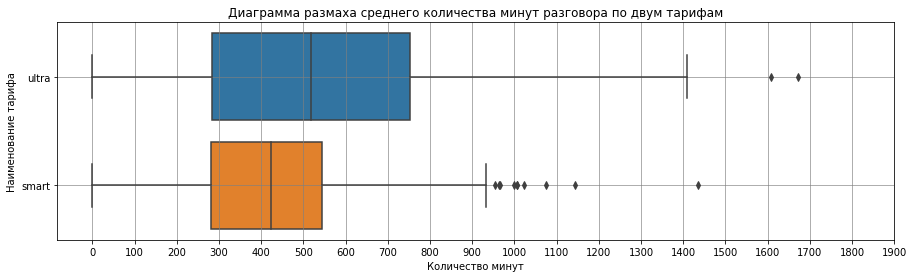

In [ ]:
plt.rcParams['figure.figsize']=(15, 4)
sns.boxplot(x=df['minutes'], y=df["tariff"], orient="h")
plt.title('Диаграмма размаха среднего количества минут разговора по двум тарифам')
plt.ylabel('Наименование тарифа')
plt.xlabel('Количество минут')
plt.grid(color='grey', axis='both', alpha=0.8)
plt.xticks(np.arange(0, 2000, 100))
plt.show()

#### Вывод

Пользователи тарифа "Ультра" в среднем используют от 284 до 752 минут в месяц.  
Пользователи тарифа "Смарт" в среднем используют от 282 до 545 минут в месяц.  
Стоит отметить, что 33% клиентов тарифа "Смарт" не укладываются в лимит по минутам (500 минут).  
Напротив, пользователи тарифа "Ультра" расходуют меньше минут, чем есть на тарифе.

### Сообщения на тарифах

Посмотрим список характерных значения для сообщений, на тарифе "Смарт" и "Ультра":

In [ ]:
df.groupby(['tariff'])['msg_number'].agg(['describe', np.var]).reset_index()

tariff describe                        ...                             var
            count       mean        std  ...   50%   75%    max   msg_number
0  smart   2229.0  33.384029  28.227876  ...  28.0  51.0  143.0   796.812958
1  ultra    985.0  49.363452  47.804457  ...  38.0  79.0  224.0  2285.266143

[2 rows x 10 columns]

Построим распределение расхода минут на тарифах:

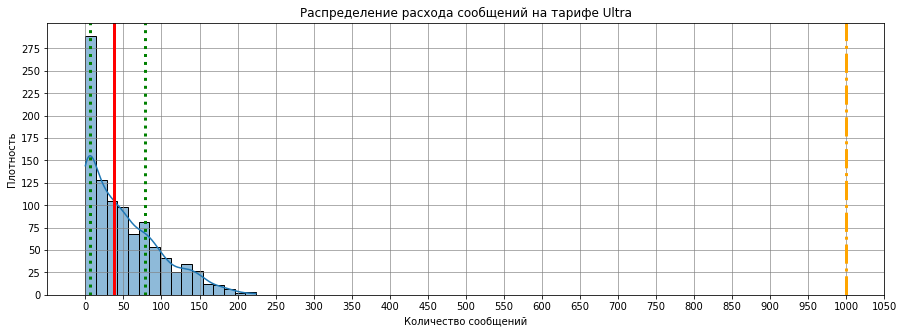

In [ ]:
plt.rcParams['figure.figsize']=(15, 5)
sns.histplot(data=df_ultra, x="msg_number", kde=True)
plt.title('Распределение расхода сообщений на тарифе Ultra')
plt.ylabel('Плотность')
plt.xlabel('Количество сообщений')
plt.grid(color='grey', axis='both', alpha=0.8)
plt.axvline(x=1000, c="orange", linewidth = 3, linestyle='-.') # лимит на тарифе
plt.axvline(x=np.median(df_ultra['msg_number']), c="red", linewidth = 3) # медиана
# интервал наиболее частых значений
plt.axvline(x=np.percentile(df_ultra['msg_number'], 25), c='g', linestyle=':', linewidth = 3)
plt.axvline(x=np.percentile(df_ultra['msg_number'], 75), c='g', linestyle=':', linewidth = 3)
plt.xticks(np.arange(0, 1100, 50))
plt.yticks(np.arange(0, 300, 25))
plt.show()

Примечание:  
Зеленые линии - интервал наиболее частных значений.  
Красная линия - медиана.  
Оранжевая линия - лимит по тарифу.  

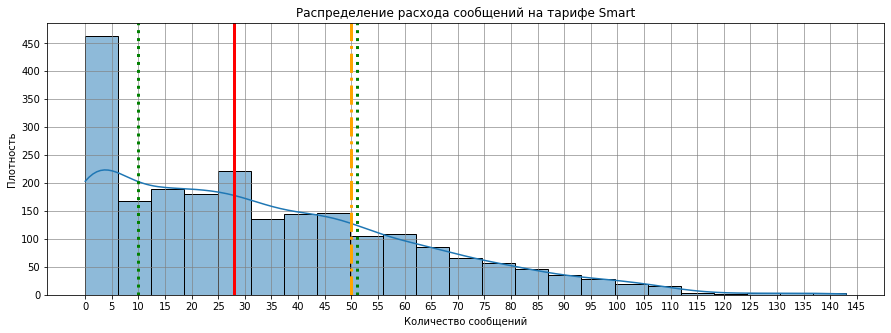

In [ ]:
plt.rcParams['figure.figsize']=(15, 5)
sns.histplot(data=df_smart, x="msg_number", kde=True)
plt.title('Распределение расхода сообщений на тарифе Smart')
plt.ylabel('Плотность')
plt.xlabel('Количество сообщений')
plt.grid(color='grey', axis='both', alpha=0.8)
plt.axvline(x=50, c="orange", linewidth = 3, linestyle='-.') # лимит на тарифе
plt.axvline(x=np.median(df_smart['msg_number']), c="red", linewidth = 3) # медиана
# интервал наиболее частых значений
plt.axvline(x=np.percentile(df_smart['msg_number'], 25), c='g', linestyle=':', linewidth = 3)
plt.axvline(x=np.percentile(df_smart['msg_number'], 75), c='g', linestyle=':', linewidth = 3)
plt.xticks(np.arange(0, 150, 5))
plt.yticks(np.arange(0, 500, 50))
plt.show()

Примечание:  
Зеленые линии - интервал наиболее частных значений.  
Красная линия - медиана.  
Оранжевая линия - лимит по тарифу.  

Доля пользователей, которые расходуют сообщений больше, чем по лимиту на тарифе:

In [ ]:
1 - st.norm(df_smart['msg_number'].mean(), df_smart['msg_number'].std()).cdf(50)

0.27805241224107813

Представим в виде диграммы размаха:

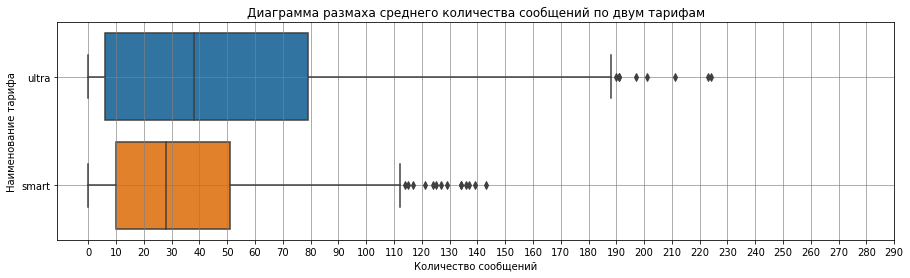

In [ ]:
plt.rcParams['figure.figsize']=(15, 4)
sns.boxplot(x=df['msg_number'], y=df["tariff"], orient="h")
plt.title('Диаграмма размаха среднего количества сообщений по двум тарифам')
plt.ylabel('Наименование тарифа')
plt.xlabel('Количество сообщений')
plt.grid(color='grey', axis='both', alpha=0.8)
plt.xticks(np.arange(0, 300, 10))
plt.show()

Определим сколько пользователей не используют сообщения:

In [ ]:
df[df['msg_number'] == 0].groupby(['tariff'])['msg_number'].agg(['count']).reset_index()

,tariff,count
0,smart,307
1,ultra,190


#### Вывод

Пользователи тарифа "Ультра" в среднем используют от 6 до 79 сообщений в месяц.  
Пользователи тарифа "Смарт" в среднем используют от 10 до 51 сообщений в месяц.  
Стоит отметить, что 29% клиентов тарифа "Смарт" не укладываются в лимит по сообщениям (50 сообщений).  
Напротив, пользователи тарифа "Ультра" расходуют меньше сообщений, чем есть на тарифе.  
При этом достаточное большое количество пользователей не используют сообщения вообще.

### Объём интернет-трафика

Посмотрим список характерных значения для минут, на тарифе "Смарт" и "Ультра":

In [ ]:
df.groupby(['tariff'])['gb_used'].agg(['describe', np.var]).reset_index()

tariff describe                                                          var
            count       mean       std  min   25%   50%   75%   max    gb_used
0  smart   2229.0  16.328847  5.747061  0.0  13.0  17.0  20.0  38.0  33.028705
1  ultra    985.0  19.494416  9.853511  0.0  12.0  19.0  27.0  49.0  97.091686

Построим распределение расхода минут на тарифах:

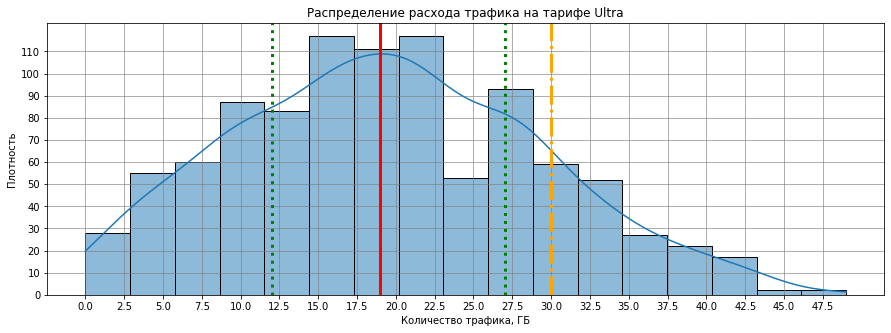

In [ ]:
plt.rcParams['figure.figsize']=(15, 5)
sns.histplot(data=df_ultra, x="gb_used", kde=True)
plt.title('Распределение расхода трафика на тарифе Ultra')
plt.ylabel('Плотность')
plt.xlabel('Количество трафика, ГБ')
plt.grid(color='grey', axis='both', alpha=0.8)
plt.axvline(x=30, c="orange", linewidth = 3, linestyle='-.') # лимит на тарифе
plt.axvline(x=np.median(df_ultra['gb_used']), c="red", linewidth = 3) # медиана
# интервал наиболее частых значений
plt.axvline(x=np.percentile(df_ultra['gb_used'], 25), c='g', linestyle=':', linewidth = 3)
plt.axvline(x=np.percentile(df_ultra['gb_used'], 75), c='g', linestyle=':', linewidth = 3)
plt.xticks(np.arange(0, 50, 2.5))
plt.yticks(np.arange(0, 120, 10))
plt.show()

Примечание:  
Зеленые линии - интервал наиболее частных значений.  
Красная линия - медиана.  
Оранжевая линия - лимит по тарифу.  

Доля пользователей, которые расходуют трафика больше, чем по лимиту на тарифе:

In [ ]:
1 - st.norm(df_ultra['gb_used'].mean(), df_ultra['gb_used'].std()).cdf(30)

0.14317189730814395

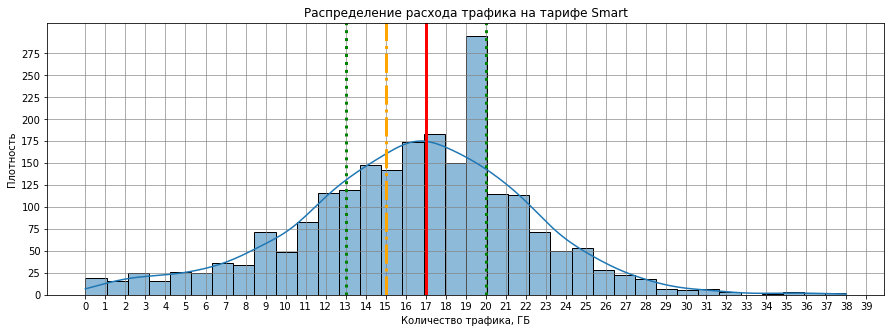

In [ ]:
plt.rcParams['figure.figsize']=(15, 5)
sns.histplot(data=df_smart, x="gb_used", kde=True)
plt.title('Распределение расхода трафика на тарифе Smart')
plt.ylabel('Плотность')
plt.xlabel('Количество трафика, ГБ')
plt.grid(color='grey', axis='both', alpha=0.8)
plt.axvline(x=15, c="orange", linewidth = 3, linestyle='-.') # лимит на тарифе
plt.axvline(x=np.median(df_smart['gb_used']), c="red", linewidth = 3) # медиана
# интервал наиболее частых значений
plt.axvline(x=np.percentile(df_smart['gb_used'], 25), c='g', linestyle=':', linewidth = 3)
plt.axvline(x=np.percentile(df_smart['gb_used'], 75), c='g', linestyle=':', linewidth = 3)
plt.xticks(np.arange(0, 40, 1))
plt.yticks(np.arange(0, 300, 25))
plt.show()

Примечание:  
Зеленые линии - интервал наиболее частных значений.  
Красная линия - медиана.  
Оранжевая линия - лимит по тарифу.  

Посмотрим на данные в районе [19; 20] ГБ (скачок данных на графике):

In [ ]:
df_smart[(df_smart['gb_used'] >= 19) & (df_smart['gb_used'] <= 20)][['minutes', 'msg_number', 'gb_used', 'city']].head(9)

,minutes,msg_number,gb_used,city
989,289,13,20,Стерлитамак
992,243,16,19,Стерлитамак
1011,316,0,20,Ульяновск
1012,275,0,19,Ульяновск
1014,267,0,20,Ульяновск
1016,379,0,19,Ульяновск
1034,213,15,20,Пермь
1036,229,12,19,Пермь
1040,290,0,19,Тюмень


In [ ]:
df_smart[(df_smart['gb_used'] >= 19) & (df_smart['gb_used'] <= 20)][['minutes', 'msg_number', 'gb_used']].describe()

,minutes,msg_number,gb_used
count,295.000000,295.000000,295.000000
mean,436.138983,36.240678,19.474576
std,178.202660,27.973378,0.500202
min,0.000000,0.000000,19.000000
25%,297.500000,14.500000,19.000000
50%,442.000000,33.000000,19.000000
75%,544.500000,55.000000,20.000000
max,1435.000000,137.000000,20.000000


Явных артефактов, аномалий не видно, может сделать вывод до 20 ГБ расход трафика, достаточно обыденно

Доля пользователей, которые расходуют трафика больше, чем по лимиту на тарифе:

In [ ]:
1 - st.norm(df_smart['gb_used'].mean(), df_smart['gb_used'].std()).cdf(15)

0.5914288422588693

Представим в виде диграммы размаха:

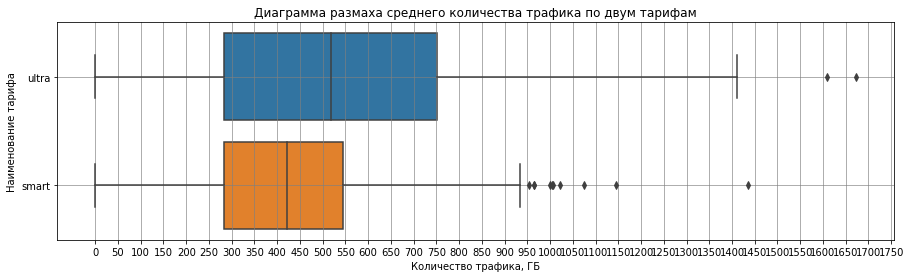

In [ ]:
plt.rcParams['figure.figsize']=(15, 4)
sns.boxplot(x=df['minutes'], y=df["tariff"], orient="h")
plt.title('Диаграмма размаха среднего количества трафика по двум тарифам')
plt.ylabel('Наименование тарифа')
plt.xlabel('Количество трафика, ГБ')
plt.grid(color='grey', axis='both', alpha=0.8)
plt.xticks(np.arange(0, 1800, 50))
plt.show()

#### Вывод

Пользователи тарифа "Ультра" в среднем используют от 12 до 27 ГБ в месяц.  
Пользователи тарифа "Смарт" в среднем используют от 13 до 20 ГБ в месяц.  
Стоит отметить, что 14% клиентов тарифа "Ультра" не укладываются в лимит трафику (30 ГБ).  
Стоит отметить, что 59% клиентов тарифа "Смарт" не укладываются в лимит трафику (15 ГБ). 

## **Шаг 4.** Проверка гипотез  

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются


Выбираем двустроннею гипотезу, так как значения меньше и больше также важны.  
За нулевую гипотезу H0 принимаем: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;  
За альтернативную H1 принимаем: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;  
Уровень статической значимости берем: 5%.  

Проведем расчет:

In [ ]:
alpha = .05 

results = st.ttest_ind(
    df_smart['total_fee'], 
    df_ultra['total_fee'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


Проверим, расчитав средние выручки по тарифам:

In [ ]:
df.groupby(['tariff'])['total_fee'].agg(['count', np.mean, 'sum']).reset_index()

,tariff,count,mean,sum
0,smart,2229,1289.973531,2875351
1,ultra,985,2070.152284,2039100


#### Вывод:

Средние выручки пользователей тарифов "Ультра" и "Смарт" различаются (2070,15 и 1289,9 соотвественно).

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Создадим датафрейм, который отфильтруем по городу Москва:

In [ ]:
df_msk = (df[df['city'] == 'Москва']).copy()

Посмотрим информацию о получившийся таблице:

In [ ]:
df_msk.head()

,user_id,month,call_number,minutes,msg_number,gb_used,age,churn_date,city,reg_date,tariff,total_fee
8,1003,8,55,380,37,9,23,NaT,Москва,2018-08-17,ultra,1950
9,1003,9,134,961,91,13,23,NaT,Москва,2018-08-17,ultra,1950
10,1003,10,108,855,83,15,23,NaT,Москва,2018-08-17,ultra,1950
11,1003,11,115,824,94,12,23,NaT,Москва,2018-08-17,ultra,1950
12,1003,12,108,802,75,10,23,NaT,Москва,2018-08-17,ultra,1950


In [ ]:
df_msk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 8 to 3172
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      611 non-null    int64         
 1   month        611 non-null    int64         
 2   call_number  611 non-null    int64         
 3   minutes      611 non-null    int64         
 4   msg_number   611 non-null    int64         
 5   gb_used      611 non-null    int64         
 6   age          611 non-null    int64         
 7   churn_date   41 non-null     datetime64[ns]
 8   city         611 non-null    object        
 9   reg_date     611 non-null    datetime64[ns]
 10  tariff       611 non-null    object        
 11  total_fee    611 non-null    int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 62.1+ KB


Создадим датафрейм, который отфильтруем по другим регионам (отличным от города Москва):

In [ ]:
df_not_msk = (df[df['city'] != 'Москва']).copy()

Посмотрим информацию о получившийся таблице:

In [ ]:
df_not_msk.head()

,user_id,month,call_number,minutes,msg_number,gb_used,age,churn_date,city,reg_date,tariff,total_fee
0,1000,5,22,159,22,3,52,NaT,Краснодар,2018-05-25,ultra,1950
1,1000,6,43,172,60,23,52,NaT,Краснодар,2018-05-25,ultra,1950
2,1000,7,47,340,75,14,52,NaT,Краснодар,2018-05-25,ultra,1950
3,1000,8,52,408,81,14,52,NaT,Краснодар,2018-05-25,ultra,1950
4,1000,9,58,466,57,15,52,NaT,Краснодар,2018-05-25,ultra,1950


In [ ]:
df_not_msk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 0 to 3213
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      2603 non-null   int64         
 1   month        2603 non-null   int64         
 2   call_number  2603 non-null   int64         
 3   minutes      2603 non-null   int64         
 4   msg_number   2603 non-null   int64         
 5   gb_used      2603 non-null   int64         
 6   age          2603 non-null   int64         
 7   churn_date   146 non-null    datetime64[ns]
 8   city         2603 non-null   object        
 9   reg_date     2603 non-null   datetime64[ns]
 10  tariff       2603 non-null   object        
 11  total_fee    2603 non-null   int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 264.4+ KB


Выбираем двустроннею гипотезу, так как значения меньше и больше также важны.  
За нулевую гипотезу H0 принимаем: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов;  
За альтернативную H1 принимаем: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  
Уровень статической значимости берем: 5%.

Проведем расчет:

In [ ]:
alpha = .05 

results_msk = st.ttest_ind(
    df_msk['total_fee'], 
    df_not_msk['total_fee'])

print('p-значение: ', results_msk.pvalue)

if results_msk.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Проверим, расчитав средние выручки по регионам:

In [ ]:
df_msk['total_fee'].mean()

1546.7135842880523

In [ ]:
df_not_msk['total_fee'].mean()

1524.9362274298885

#### Вывод

Средние выручки пользователей тарифов "Ультра" и "Смарт" в Москве и в регионах практически равны (1546,7 и 1524,9 соотвественно).

## **Шаг 5.** Общий вывод

1. При изучении общей информации, стоит отметить:  
- даные достаточно корретные, явных выбросов и анамалий не замечено;
- признаки с датой требуется привести к формату даты;
- имеются пропущенные значения в таблице `users` в колонке `churn_date`, что означет, пользователь еще пользуется тарифом; 
- в таблицах `calls` и `internet` имеются нулевые значения в продолжительности разговора и использовании интернет-трафика, что может соответстовать пропущенным звонкам, либо пользователь набрал и сбросил, так и трафик, предполжительно менее 0,04 МБ;
- признаки продолжительность вызова и использования интернет-трафика требуется округлить согласно правилам оператор.

2. При проведении предобработки данных выполнили:  
- Подготовили сводную общую таблицу для дальнейшей работы.  
- Добавили колонку `'total_fee'` с помесячной выручкой по каждому пользователю.  
- Определили отсутствие дубликатов, привели данные с датами к типу дата.


3. Исходя из анализа данных по тарифам в разрезе использования минут, сообщений, интернет-трафика, можно выделить следующий средний расход, а также средную выручку:

| Тариф    | Кол. абонентов | Расход минут | Расход сообщений | Расход интернет-трафика, ГБ | Средняя выручка, руб| Общая выручка, руб |
|----------|-----|----------------|-------------|--------------|---------|-----| 
| Ультра   | 2229|от 284 до 752   | от 6 до 79  | от 12 до 27  | 2070,15 | 2039100 |
| Смарт    | 985|от 284 до 545   | от 10 до 51 | от 13 до 20  | 1289,9  | 2875351 |

При этом не менее 29 % клиентов тарифа "Смарт" не укладываются в установленные лимиты по сообщениям, звонкам и интернету.    
А 14% пользователей тарифа "Ультра" не укладываются в лимиты только по интернет трафику, а минут и сообщений в избытке.  

Также, региональная зависимость по выручке Москвы и регионов практически не отличается (1546,7 и 1524,9 соотвественно).  

4. **Ответ на вопрос исследования**: Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег:  
Тариф "Смарт" приносит больше прибыли, при меньшей абонентской плате, но из-за перерасхода пакета выручка повышается.

При этом, требуется скорректировать тариф "Ультра", возможно уменьшив пакет минут, смс, и снизить абонентскую плату, что может привести к увеличению выручки с данного тарифа.